## Objetivo

Usar a técnica de Logistic Regression para Detectar se existe um gato na imagem ou não 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando o Dataset

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
X_train = np.array(train_dataset["train_set_x"][:]) 
y_train = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
X_test = np.array(test_dataset["test_set_x"][:]) 
y_test = np.array(test_dataset["test_set_y"][:]) 

y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

y = 1. It's a cat picture.


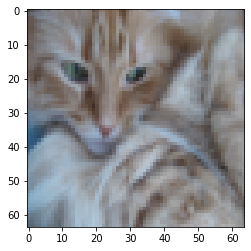

In [6]:
#Mostrando uma imagem de exemplo
classes = ["non cat", "cat"]
index = 2
plt.imshow(X_train[index])
print ("y = " + str(y_train[0,index]) + ". It's a " + classes[y_train[0,index]] +  " picture.")

In [7]:
# Explore your dataset 
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(X_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x_orig shape: " + str(X_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [8]:
# Reshape the training and test examples 
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T   
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = X_train_flatten/255.
test_x = X_test_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
regressor = LogisticRegression(solver='liblinear')
regressor.fit(train_x.T,y_train.T.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
predictions = regressor.predict(test_x.T)
print(predictions)
print(y_test[0])

[1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 1 1 0]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0]


In [12]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test[0], predictions)
print(acuracia)

0.72


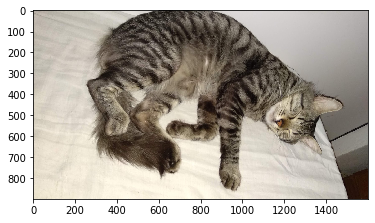

In [23]:
#Testando em uma imagem nova
import cv2
img = cv2.imread("ninho.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [24]:
resize_img = cv2.resize(img,(64,64))
reshape_img = resize_img.reshape(1,-1)
print(reshape_img.shape)

(1, 12288)


In [25]:
regressor.predict(reshape_img)

array([1])